In [278]:
#Importing essential libraries for the script

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## EXPLORATIVE  DATA  ANALYSIS

In [279]:
# Reading in our dataset

data=pd.read_csv(r"C:\Users\Eva\Downloads\Student Spending Habit\student_spending (1).csv")

In [280]:
#Import deepcopy to duplicate our dataset in order to have an original from a cleaned one

from copy import deepcopy

In [281]:
#Asssigning our data to a different variable to distinguish the original dataset from the cleaned dataset.

df=deepcopy(data)

In [282]:
#Displaying all rows and columns in the dataset.

pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)
df.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [283]:
#Dropping unnecessary columns.

df.drop('Unnamed: 0',axis=1,inplace=True)

In [284]:
#Taking note of our data information and its memory usage 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   object
 2   year_in_school            1000 non-null   object
 3   major                     1000 non-null   object
 4   monthly_income            1000 non-null   int64 
 5   financial_aid             1000 non-null   int64 
 6   tuition                   1000 non-null   int64 
 7   housing                   1000 non-null   int64 
 8   food                      1000 non-null   int64 
 9   transportation            1000 non-null   int64 
 10  books_supplies            1000 non-null   int64 
 11  entertainment             1000 non-null   int64 
 12  personal_care             1000 non-null   int64 
 13  technology                1000 non-null   int64 
 14  health_wellness          

In [285]:
#Converting the 'object' datatypes into a  more memory-effecient datatype 'category'
#for every column that has an 'object datatype',convert to a category datatype,cause it is more effecient.k

for col in df.columns:
    if df[col].dtype =='object':
        df[col]=df[col].astype('category')



In [286]:
#Checking for corrected measures
#Watch out for the significant reduction in memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       1000 non-null   int64   
 1   gender                    1000 non-null   category
 2   year_in_school            1000 non-null   category
 3   major                     1000 non-null   category
 4   monthly_income            1000 non-null   int64   
 5   financial_aid             1000 non-null   int64   
 6   tuition                   1000 non-null   int64   
 7   housing                   1000 non-null   int64   
 8   food                      1000 non-null   int64   
 9   transportation            1000 non-null   int64   
 10  books_supplies            1000 non-null   int64   
 11  entertainment             1000 non-null   int64   
 12  personal_care             1000 non-null   int64   
 13  technology                1000 non-null   int64  

In [287]:
#Counting the number of null spaces in the dataset

df.isnull().sum()

age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

In [288]:
#Searching for clones in the dataset,that is repeated values in the dataset

df.duplicated().sum()

0

In [289]:
df.shape

(1000, 17)

In [290]:
#Unleashing the statistical summary of the data frame

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,21.675,2.322664,18.0,20.00,22.0,24.00,25.0
monthly_income,1000.0,1020.650,293.841161,501.0,770.75,1021.0,1288.25,1500.0
financial_aid,1000.0,504.771,287.092575,0.0,261.00,513.0,751.50,1000.0
tuition,1000.0,4520.395,860.657944,3003.0,3779.75,4547.5,5285.00,6000.0
housing,1000.0,696.006,171.218620,401.0,538.75,704.5,837.25,1000.0
food,1000.0,252.642,86.949606,100.0,175.00,255.0,330.00,400.0
transportation,1000.0,124.637,43.557990,50.0,88.00,123.0,162.25,200.0
books_supplies,1000.0,174.761,72.404518,50.0,112.00,175.0,238.00,300.0
entertainment,1000.0,84.814,37.970451,20.0,54.00,86.0,116.00,150.0
personal_care,1000.0,60.699,22.898007,20.0,41.00,62.0,80.00,100.0


In [291]:
#Listing out all columns in the dataset for easy analysis 

df.columns

Index(['age', 'gender', 'year_in_school', 'major', 'monthly_income',
       'financial_aid', 'tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous', 'preferred_payment_method'],
      dtype='object')

In [292]:
#Hunting for outliers using the IQR method

numeric_columns=['age', 'monthly_income', 'financial_aid', 'tuition',
                 
'housing', 'food', 'transportation',
                 
'books_supplies', 'entertainment', 'personal_care',
                 
'technology', 'health_wellness', 'miscellaneous']

#The IQR method
Q1= df[numeric_columns].quantile(0.25)
Q3= df[numeric_columns].quantile(0.75)
IQR=Q3-Q1

IQR_Outliers = ((df[numeric_columns]   <  (Q1 - 1.5 * IQR)) | (df [numeric_columns]  > (Q3 + 1.5 *IQR)))

#Displaying the outliers
print ("\nOutliers(IQR Method):")
print(IQR_Outliers.sum())
print("\nNo outliers outliers were detected")



Outliers(IQR Method):
age                0
monthly_income     0
financial_aid      0
tuition            0
housing            0
food               0
transportation     0
books_supplies     0
entertainment      0
personal_care      0
technology         0
health_wellness    0
miscellaneous      0
dtype: int64

No outliers outliers were detected


In [293]:
numeric_columns

['age',
 'monthly_income',
 'financial_aid',
 'tuition',
 'housing',
 'food',
 'transportation',
 'books_supplies',
 'entertainment',
 'personal_care',
 'technology',
 'health_wellness',
 'miscellaneous']

In [294]:
numeric_columns=df.select_dtypes('int')
numeric_columns.head()

,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
0,19,958,270,5939,709,296,123,188,41,78,134,127,72
1,24,1006,875,4908,557,365,85,252,74,92,226,129,68
2,24,734,928,3051,666,220,137,99,130,23,239,112,133
3,23,617,265,4935,652,289,114,223,99,30,163,105,55
4,20,810,522,3887,825,372,168,194,48,71,88,71,104


In [295]:
#Calling out the categorical features in the data.

cat_features=df.select_dtypes('category')
cat_features.head()

,gender,year_in_school,major,preferred_payment_method
0,Non-binary,Freshman,Psychology,Credit/Debit Card
1,Female,Junior,Economics,Credit/Debit Card
2,Non-binary,Junior,Economics,Cash
3,Female,Senior,Computer Science,Mobile Payment App
4,Female,Senior,Computer Science,Credit/Debit Card


In [296]:
print(cat_features.head())

       gender year_in_school             major preferred_payment_method
0  Non-binary       Freshman        Psychology        Credit/Debit Card
1      Female         Junior         Economics        Credit/Debit Card
2  Non-binary         Junior         Economics                     Cash
3      Female         Senior  Computer Science       Mobile Payment App
4      Female         Senior  Computer Science        Credit/Debit Card


In [297]:
print(cat_features.dtypes)

gender                      category
year_in_school              category
major                       category
preferred_payment_method    category
dtype: object


In [298]:
print(cat_features.columns)

Index(['gender', 'year_in_school', 'major', 'preferred_payment_method'], dtype='object')


In [299]:
#Importing stats for calculation

from scipy import stats

In [300]:
from tabulate import tabulate

def column_info_table(df):
    # Create a DataFrame with column information
    table_df = pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes.values,
        'Number of Unique Values': df.nunique().values,
        'Unique Values': [df[column].unique()[ :5]
                          for column in df.columns]
    })

    return table_df

# Assuming df is your DataFrame
result_table = column_info_table(df)

# Display the table using tabulate
print(tabulate(result_table, headers='keys', tablefmt='grid'))
    
    

+----+--------------------------+-------------+---------------------------+---------------------------------------------------------------------------------------------------+
|    | Column Name              | Data Type   |   Number of Unique Values | Unique Values                                                                                     |
+====+==========================+=============+===========================+===================================================================================================+
|  0 | age                      | int64       |                         8 | [19 24 23 20 25]                                                                                  |
+----+--------------------------+-------------+---------------------------+---------------------------------------------------------------------------------------------------+
|  1 | gender                   | category    |                         3 | ['Non-binary', 'Female', 'Male']            

In [301]:
df.shape

(1000, 17)

## DATA VISUALIZATION

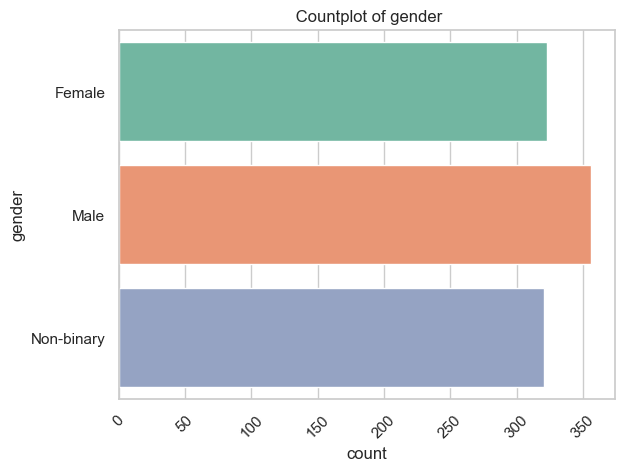

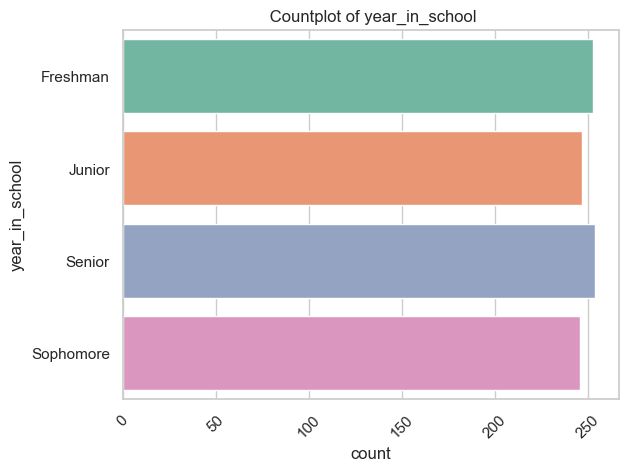

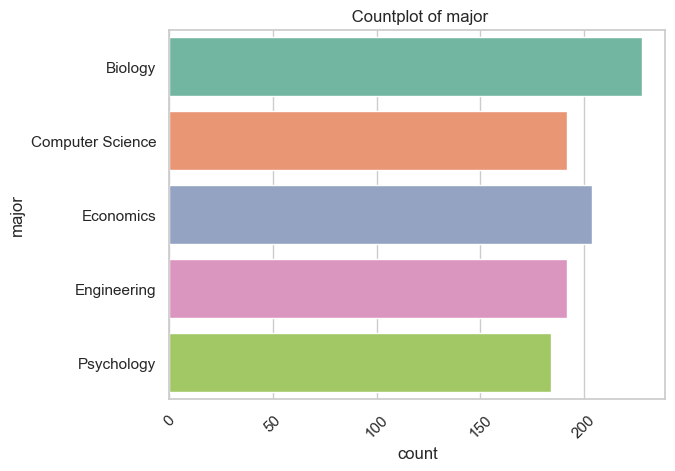

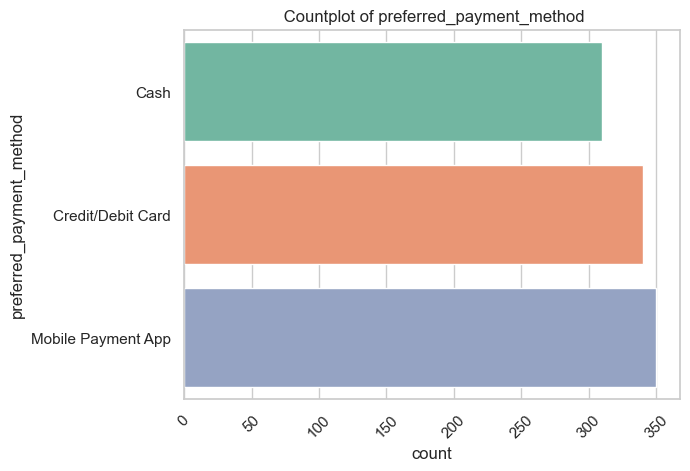

In [302]:
for col in cat_features:
    sns.countplot(y=col, data=cat_features,palette ='Set2')
    plt.title(f' Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

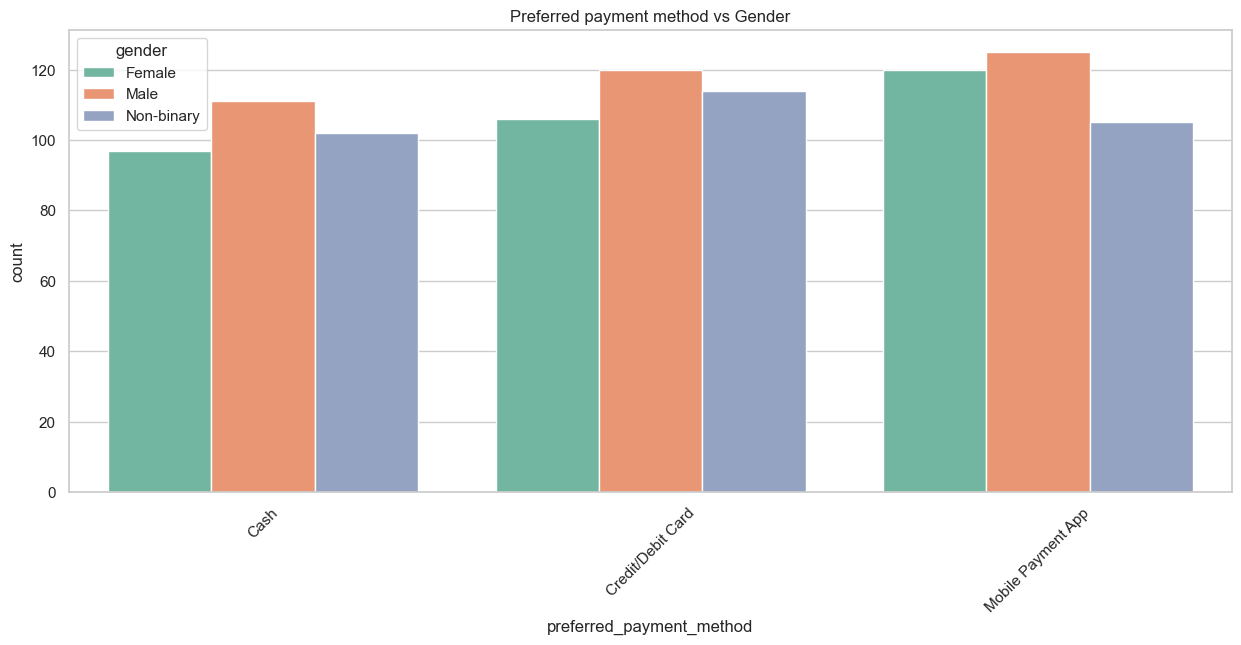

In [303]:
plt.figure(figsize=(15,6))
sns.countplot(x=cat_features['preferred_payment_method'], hue=cat_features['gender'],palette='Set2')
plt.title('Preferred payment method vs Gender')
plt.xticks(rotation =45)
plt.show()


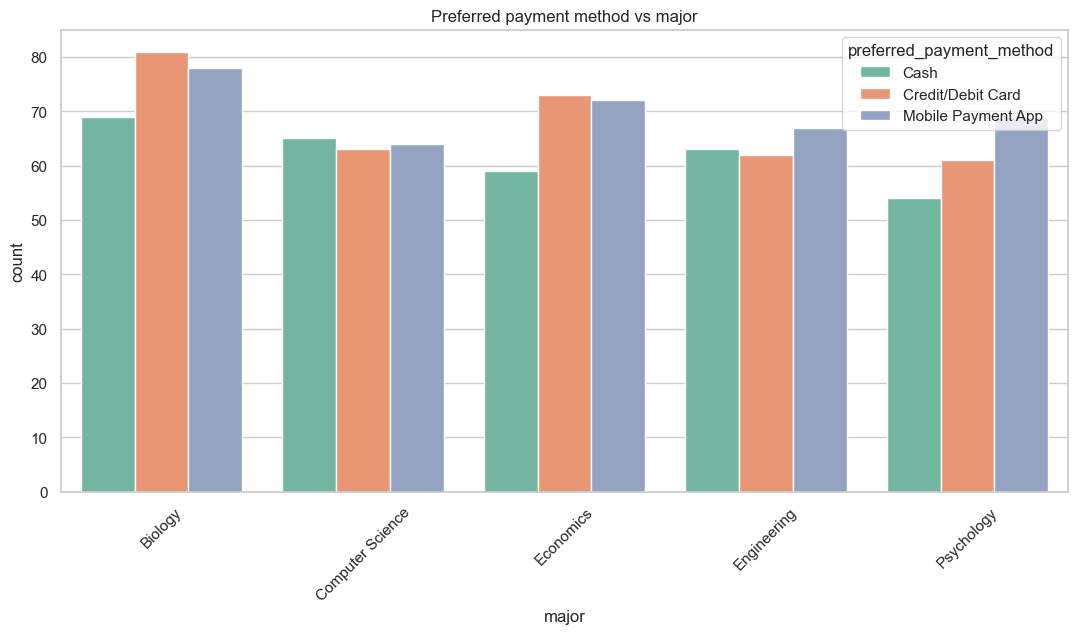

In [304]:
plt.figure(figsize=(13,6))
sns.countplot(x=cat_features['major'], hue=cat_features['preferred_payment_method'],palette='Set2')
plt.title('Preferred payment method vs major')
plt.xticks(rotation =45)
plt.show()


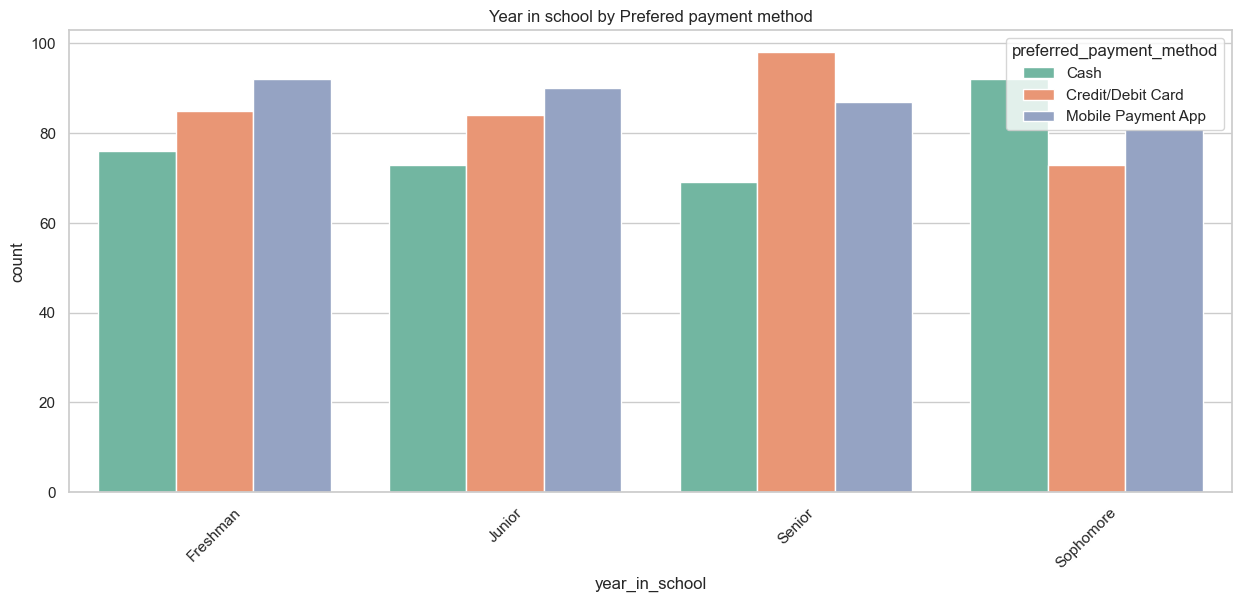

In [305]:
plt.figure(figsize=(15,6))
sns.countplot(x=cat_features['year_in_school'],hue=cat_features['preferred_payment_method'],palette='Set2')
plt.title('Year in school by Prefered payment method')
plt.xticks(rotation=45)
plt.show()


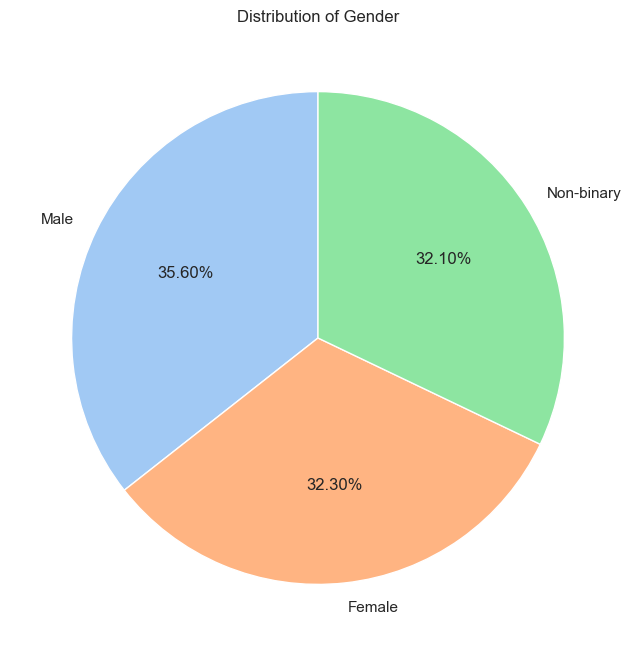

In [306]:
# Set the style
sns.set(style="ticks")

# Create a pie chart for 'gender'
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.2f%%', colors=sns.color_palette('pastel'), startangle=90)

# Set plot title
ax.set_title('Distribution of Gender')

# Display the plot
plt.show()

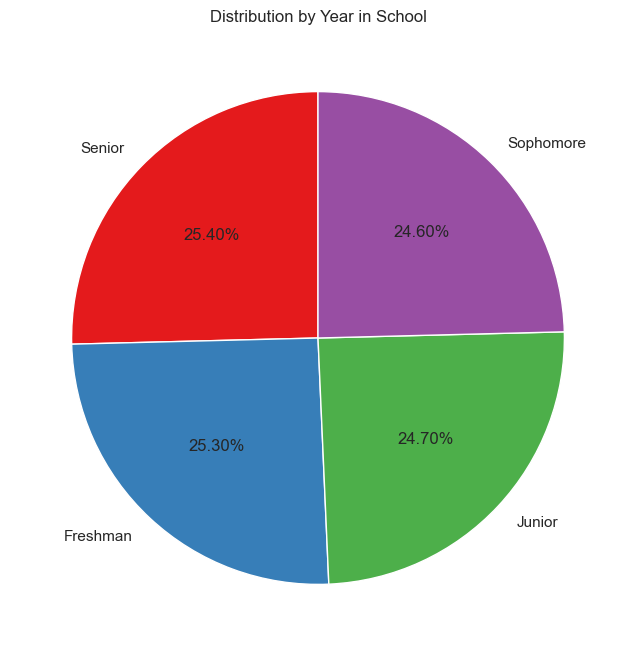

In [307]:
sns.set(style="darkgrid")

fig,ax = plt.subplots(figsize=(8,8))
ax.pie(df['year_in_school'].value_counts(), labels=df['year_in_school'].value_counts().index,  
autopct='%1.2f%%',colors=sns.color_palette('Set1'),startangle=90)

ax.set_title('Distribution by Year in School')

plt.show()

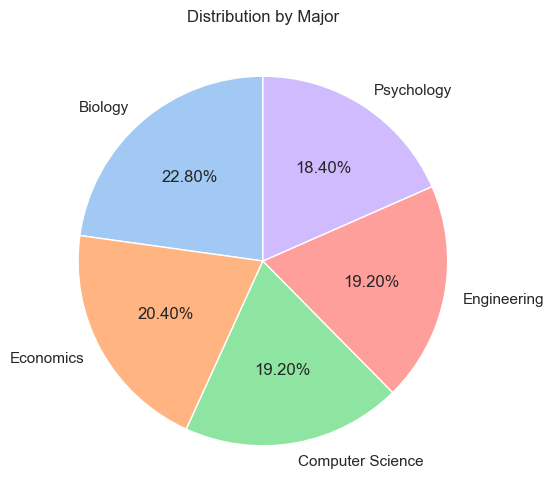

In [308]:
sns.set(style="whitegrid")

fig,ax=plt.subplots(figsize=(6,6))
ax.pie(df['major'].value_counts(), labels=df['major'].value_counts().index, 
       autopct='%1.2f%%', colors=sns.color_palette('pastel'),startangle=90)

ax.set_title('Distribution by Major')

plt.show()

In [309]:
print(cat_features.head())

       gender year_in_school             major preferred_payment_method
0  Non-binary       Freshman        Psychology        Credit/Debit Card
1      Female         Junior         Economics        Credit/Debit Card
2  Non-binary         Junior         Economics                     Cash
3      Female         Senior  Computer Science       Mobile Payment App
4      Female         Senior  Computer Science        Credit/Debit Card


In [310]:
print(cat_features.dtypes)

gender                      category
year_in_school              category
major                       category
preferred_payment_method    category
dtype: object


In [311]:
print(cat_features.columns)

Index(['gender', 'year_in_school', 'major', 'preferred_payment_method'], dtype='object')


In [312]:
print(numeric_columns.head())

   age  monthly_income  financial_aid  tuition  housing  food  transportation  \
0   19             958            270     5939      709   296             123   
1   24            1006            875     4908      557   365              85   
2   24             734            928     3051      666   220             137   
3   23             617            265     4935      652   289             114   
4   20             810            522     3887      825   372             168   

   books_supplies  entertainment  personal_care  technology  health_wellness  \
0             188             41             78         134              127   
1             252             74             92         226              129   
2              99            130             23         239              112   
3             223             99             30         163              105   
4             194             48             71          88               71   

   miscellaneous  
0            

In [313]:
print(numeric_columns.dtypes)

age                int64
monthly_income     int64
financial_aid      int64
tuition            int64
housing            int64
food               int64
transportation     int64
books_supplies     int64
entertainment      int64
personal_care      int64
technology         int64
health_wellness    int64
miscellaneous      int64
dtype: object


In [314]:
print(numeric_columns.columns)

Index(['age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous'],
      dtype='object')


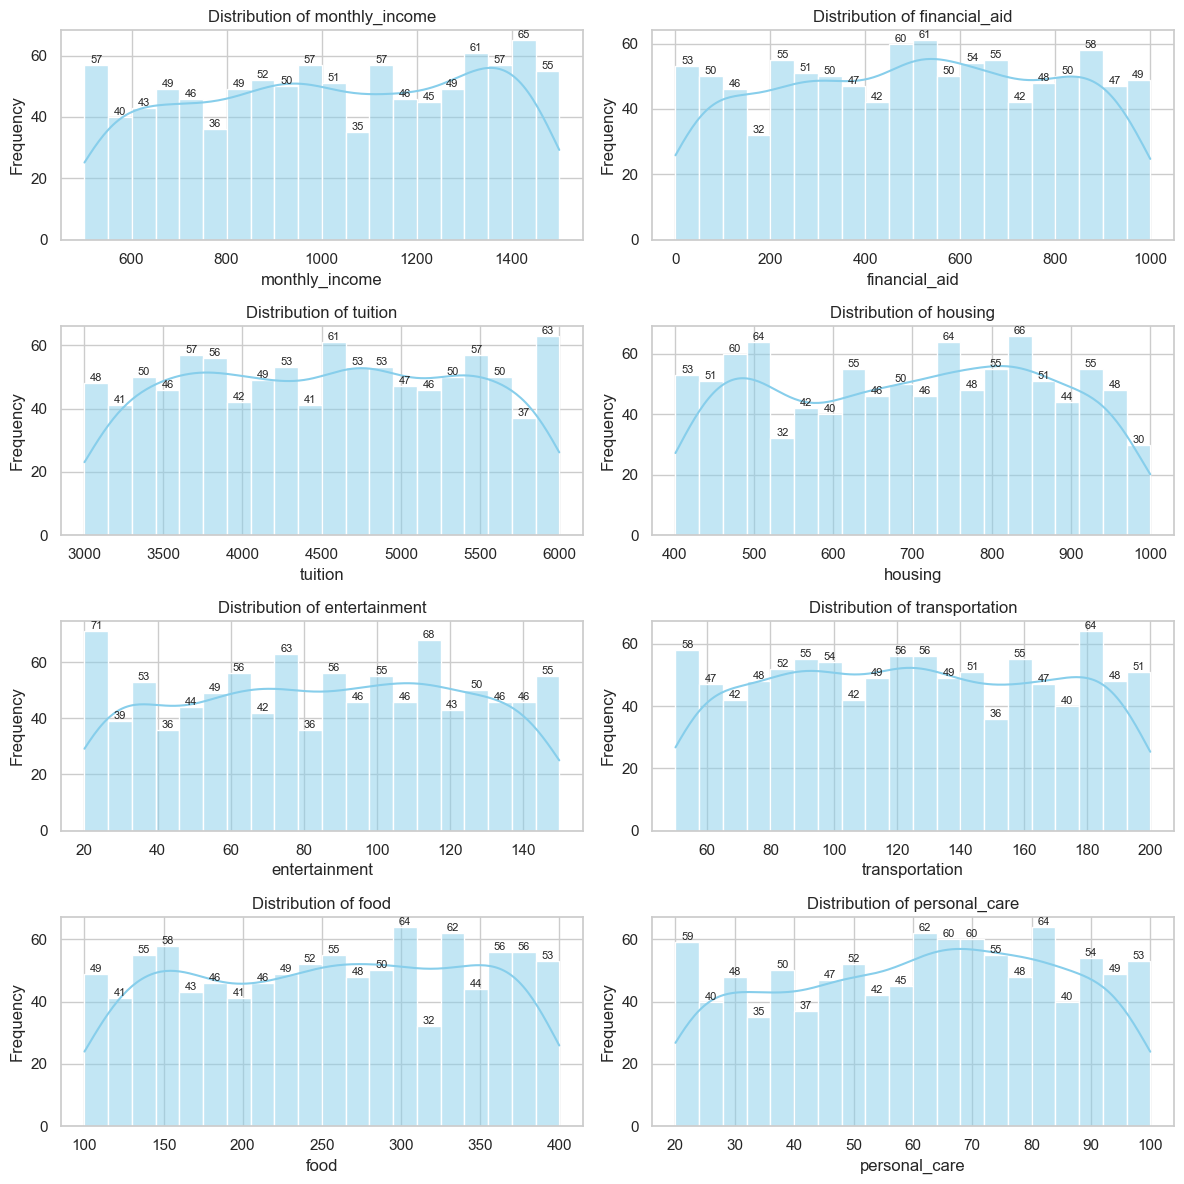

In [331]:
selected_columns=['monthly_income', 'financial_aid', 'tuition', 'housing','entertainment','transportation','food','personal_care']

#Determine the number of rows and columns for subplots
num_rows= len(selected_columns) // 2 + len(selected_columns) % 2
num_cols= 2

#Set up subplots
fig,axes=plt.subplots(num_rows, num_cols ,figsize=(12,3 * num_rows))

#Flatten the axes array for easy iteration
axes=axes.flatten()

#Plot histogram for the selected columns
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], bins=20, kde=True, ax=axes[i],color='skyblue')
    
    #Add numbers on top of each bar
    for rect in axes[i].patches:
        height=rect.get_height()
        axes[i].text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}' , ha= 'center' , va ='bottom' , fontsize=8)
        
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        
        #Adjust layout to prevent overlapping
        plt.tight_layout()
        
#Display the plot
plt.show()
        


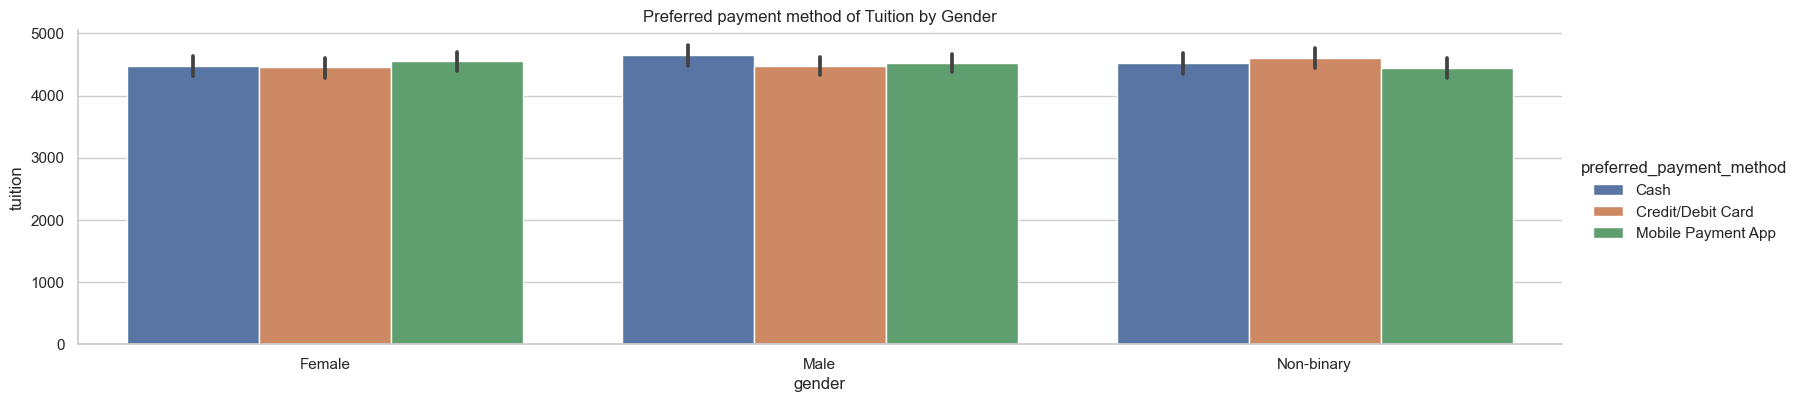

In [324]:
sns.catplot(x='gender', y='tuition', hue='preferred_payment_method', data=df, kind='bar' ,aspect=4, height=4)
plt.title('Preferred payment method of Tuition by Gender')
plt.show()

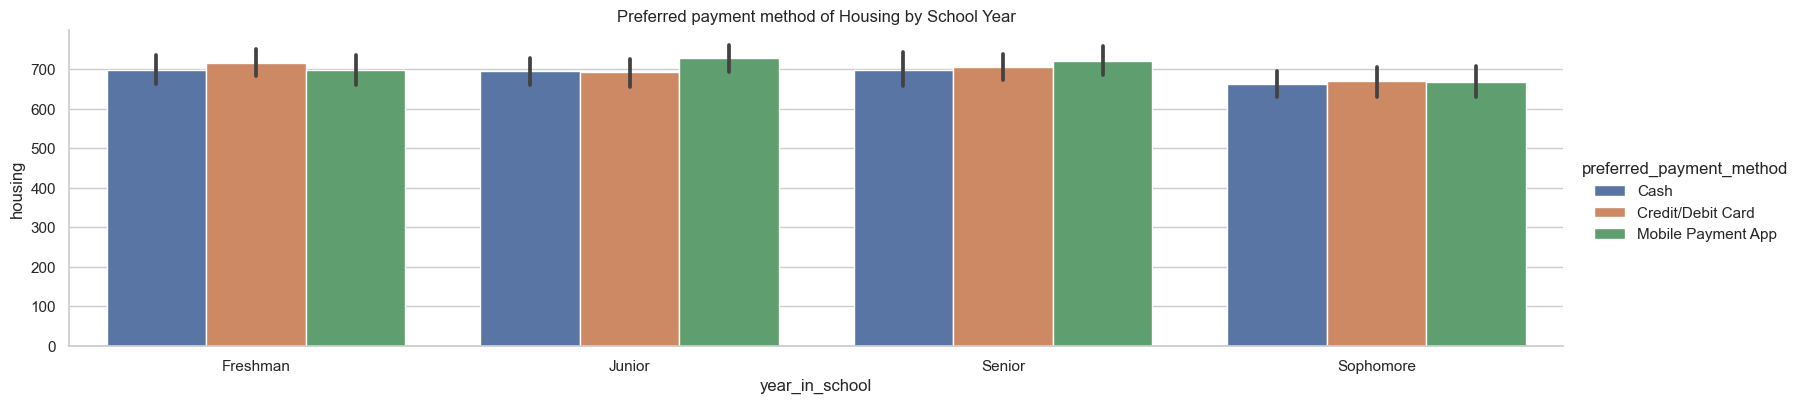

In [325]:
sns.catplot(x='year_in_school', y='housing', hue='preferred_payment_method', data=df, kind='bar' ,aspect=4, height=4)
plt.title('Preferred payment method of Housing by School Year')
plt.show()

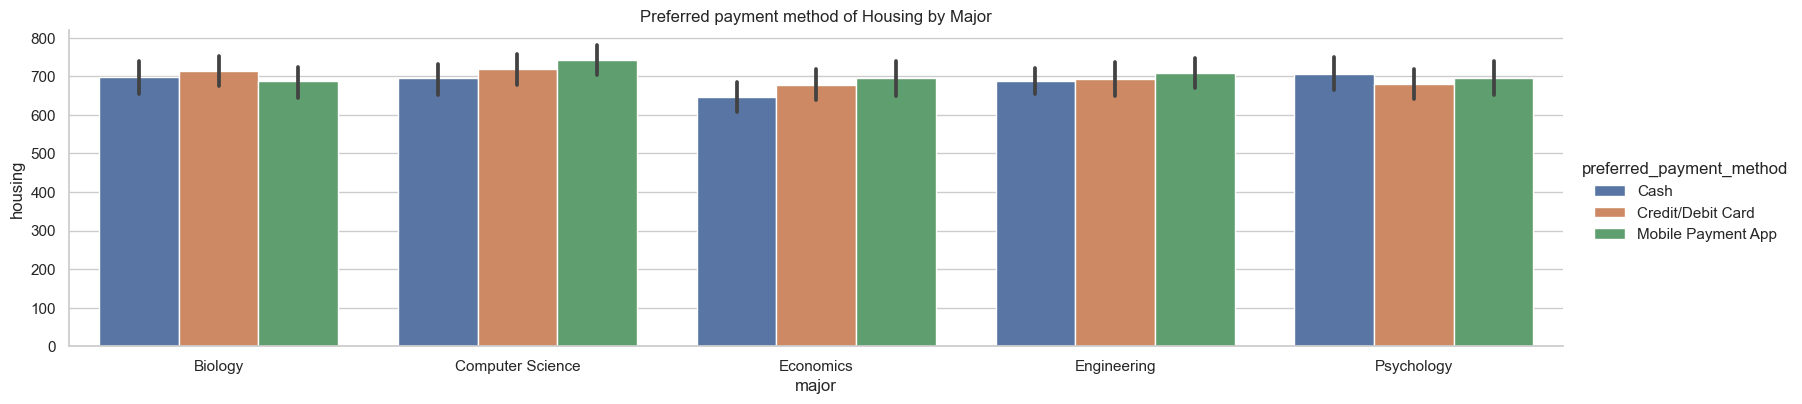

In [326]:
sns.catplot(x='major', y='housing', hue='preferred_payment_method', data=df, kind='bar' ,aspect=4, height=4)
plt.title('Preferred payment method of Housing by Major')
plt.show()

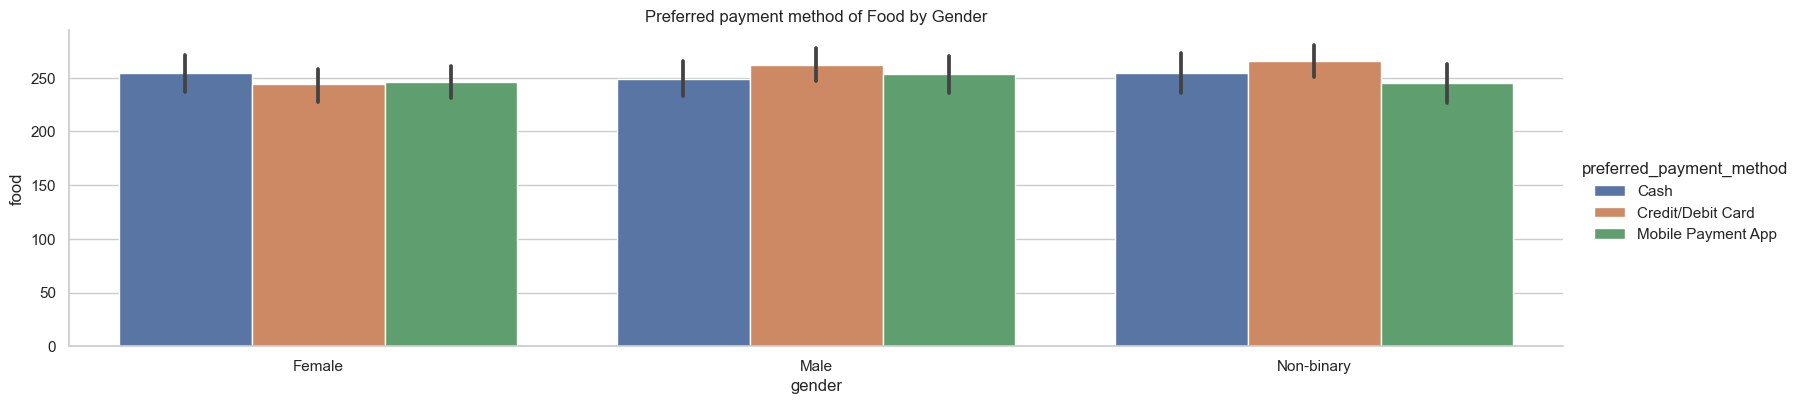

In [327]:
sns.catplot(x='gender', y='food', hue='preferred_payment_method', data=df, kind='bar' ,aspect=4, height=4)
plt.title('Preferred payment method of Food by Gender')
plt.show()


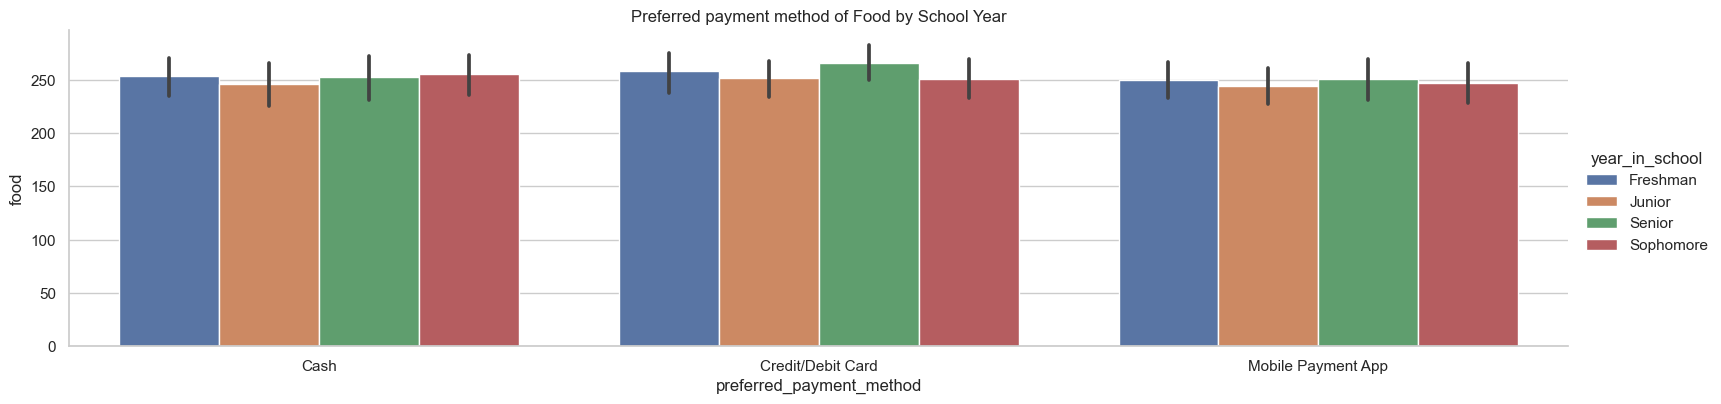

In [328]:
sns.catplot(x='preferred_payment_method', y='food', hue='year_in_school', data=df, kind='bar' ,aspect=4, height=4)
plt.title('Preferred payment method of Food by School Year')
plt.show()

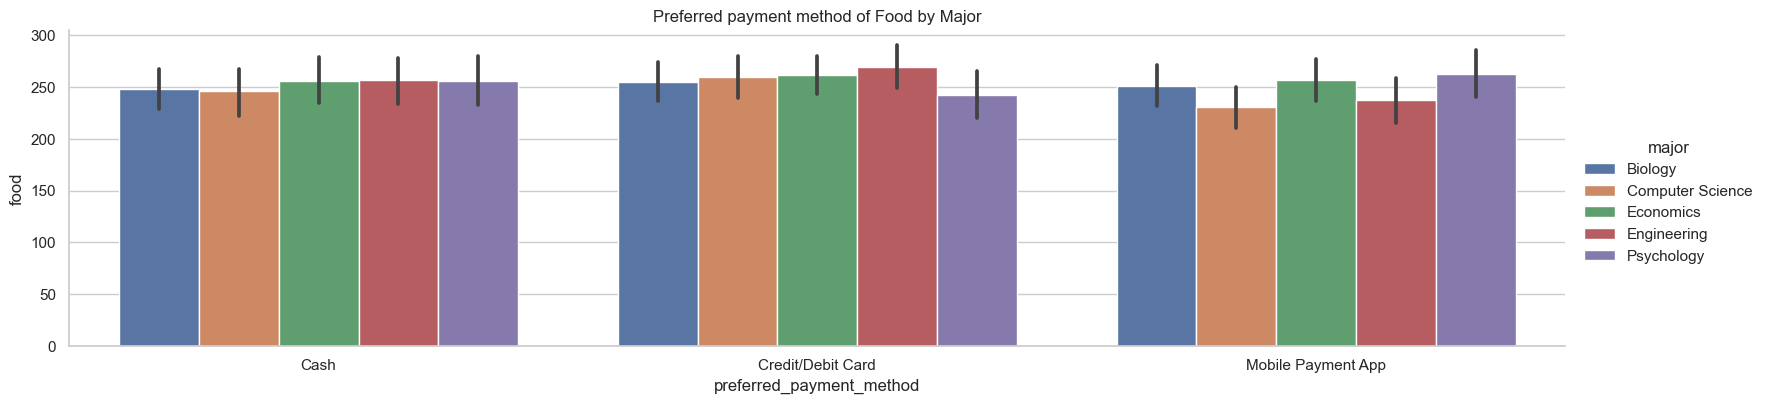

In [329]:
sns.catplot(x='preferred_payment_method', y='food', hue='major', data=df, kind='bar' ,aspect=4, height=4)
plt.title('Preferred payment method of Food by Major')
plt.show()

In [341]:
from sklearn.preprocessing import LabelEncoder

In [342]:
df_copy=df.copy()

le = LabelEncoder()

categorical_columns=['gender','year_in_school','major','preferred_payment_method']

for column in categorical_columns:
    df_copy[column]=le.fit_transform (df_copy[column])

In [343]:
correlation_matrix=df_copy.corr()

In [344]:
correlation_matrix.iloc[ :,-1].sort_values(ascending=False)

preferred_payment_method    1.000000
housing                     0.040399
financial_aid               0.037379
miscellaneous               0.027421
major                       0.017775
monthly_income             -0.009190
technology                 -0.018255
tuition                    -0.020909
food                       -0.021536
age                        -0.022827
gender                     -0.030592
personal_care              -0.034246
year_in_school             -0.043819
health_wellness            -0.044043
transportation             -0.049212
books_supplies             -0.054213
entertainment              -0.064413
Name: preferred_payment_method, dtype: float64

,monthly_income,financial_aid,tuition,housing,entertainment,food,transportation
monthly_income,1.000000,0.037050,-0.000149,0.004471,0.024454,-0.018521,0.046152
financial_aid,0.037050,1.000000,0.008536,-0.008199,0.014249,0.017463,0.017674
tuition,-0.000149,0.008536,1.000000,-0.020992,-0.036925,-0.019216,0.036734
housing,0.004471,-0.008199,-0.020992,1.000000,0.021142,-0.038335,-0.001975
entertainment,0.024454,0.014249,-0.036925,0.021142,1.000000,0.012960,0.008505
food,-0.018521,0.017463,-0.019216,-0.038335,0.012960,1.000000,-0.003443
transportation,0.046152,0.017674,0.036734,-0.001975,0.008505,-0.003443,1.000000


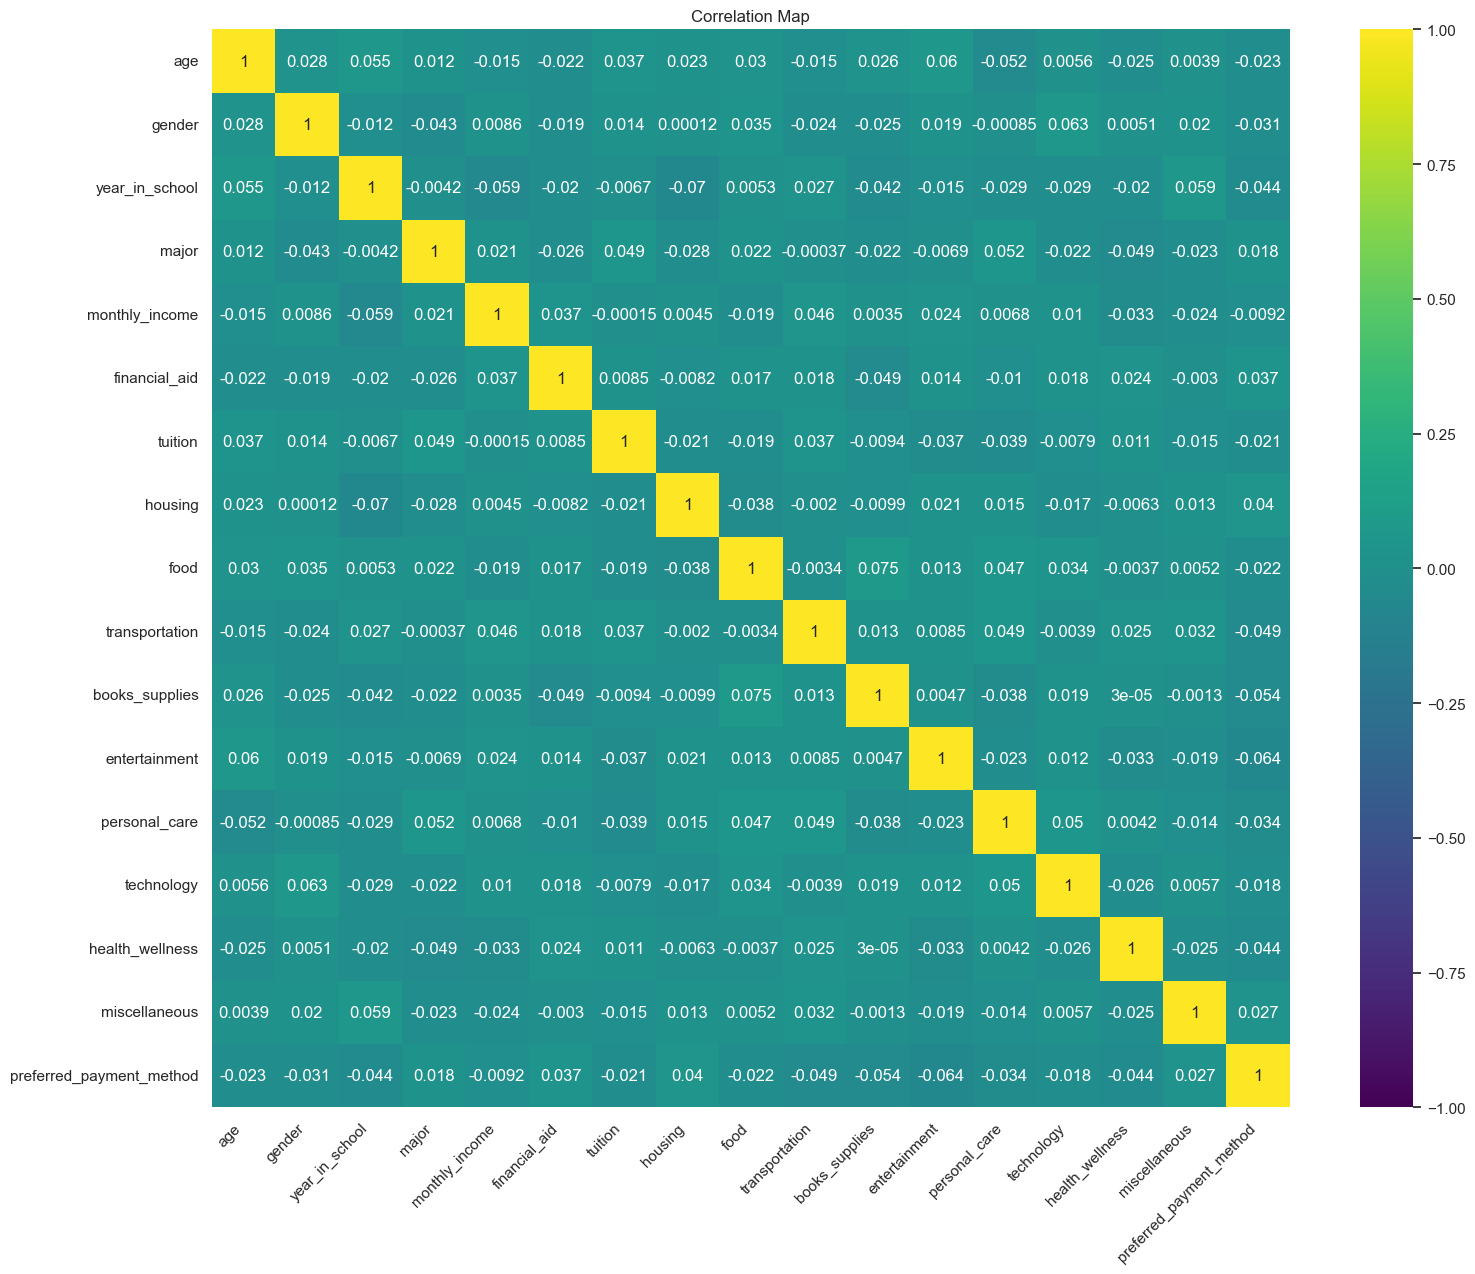

In [351]:

plt.figure(figsize=(18,14))
ax= sns.heatmap(correlation_matrix,vmin=-1,vmax=1,center=0,square=True, cmap='viridis',annot=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.title('Correlation Map')

corr


In [355]:
cat_features=df.select_dtypes('category')
cat_features

,gender,year_in_school,major,preferred_payment_method
0,Non-binary,Freshman,Psychology,Credit/Debit Card
1,Female,Junior,Economics,Credit/Debit Card
2,Non-binary,Junior,Economics,Cash
3,Female,Senior,Computer Science,Mobile Payment App
4,Female,Senior,Computer Science,Credit/Debit Card
5,Non-binary,Sophomore,Computer Science,Mobile Payment App
6,Female,Freshman,Engineering,Credit/Debit Card
7,Female,Junior,Economics,Mobile Payment App
8,Non-binary,Senior,Computer Science,Credit/Debit Card
9,Female,Junior,Computer Science,Mobile Payment App


In [358]:
for col in cat_features:
    cat_features[col]=le.fit_transform(cat_features[col])

In [359]:
cat_features.head()

,gender,year_in_school,major,preferred_payment_method
0,2,0,4,1
1,0,1,2,1
2,2,1,2,0
3,0,2,1,2
4,0,2,1,1


## FEATURE SELECTION

In [366]:
X = cat_features[['gender','year_in_school','major']]
y = cat_features['preferred_payment_method']

X.head()

,gender,year_in_school,major
0,2,0,4
1,0,1,2
2,2,1,2
3,0,2,1
4,0,2,1


## MODEL BUILDING

In [368]:
from sklearn.feature_selection import SelectKBest,chi2
X_new=SelectKBest(k=2).fit_transform(X,y)

X_new

array([[2, 0],
       [0, 1],
       [2, 1],
       ...,
       [1, 1],
       [2, 2],
       [2, 3]])

In [371]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.3, random_state=10)


In [372]:
model=LogisticRegression().fit(X,y)

print (model)

LogisticRegression()


In [373]:
predictions=model.predict(X_test)

## MODEL EVALUATION

In [374]:
from sklearn.metrics import accuracy_score

print('Accuracy:', accuracy_score (y_test,predictions))

Accuracy: 0.2966666666666667


In [375]:
print('Accuracy: ',accuracy_score(y_train,model.predict(X_train)))

Accuracy:  0.37714285714285717
